In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from churn_predictor.dataset import get_cleaned_dataframe
import churn_predictor.plot as plots

In [3]:
df = get_cleaned_dataframe()

In [4]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9992,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9993,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9994,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [7]:
cat_vars = [
    'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'
]
num_vars = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
]

**Univariate Analysis**

Se evaluarán métricas como medidas de tendencia central, media, moda, mediana, etc

In [8]:
df[num_vars].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,650.503301,38.921071,5.013305,76476.263216,1.530212,100106.701248
std,96.624668,10.488421,2.892353,62397.118820,0.581684,57513.314398
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,100238.110000
75%,717.250000,44.000000,7.250000,127639.372500,2.000000,149400.107500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Las variables con una distribución asimétrica son `Balance` y `NumOfProducts`.

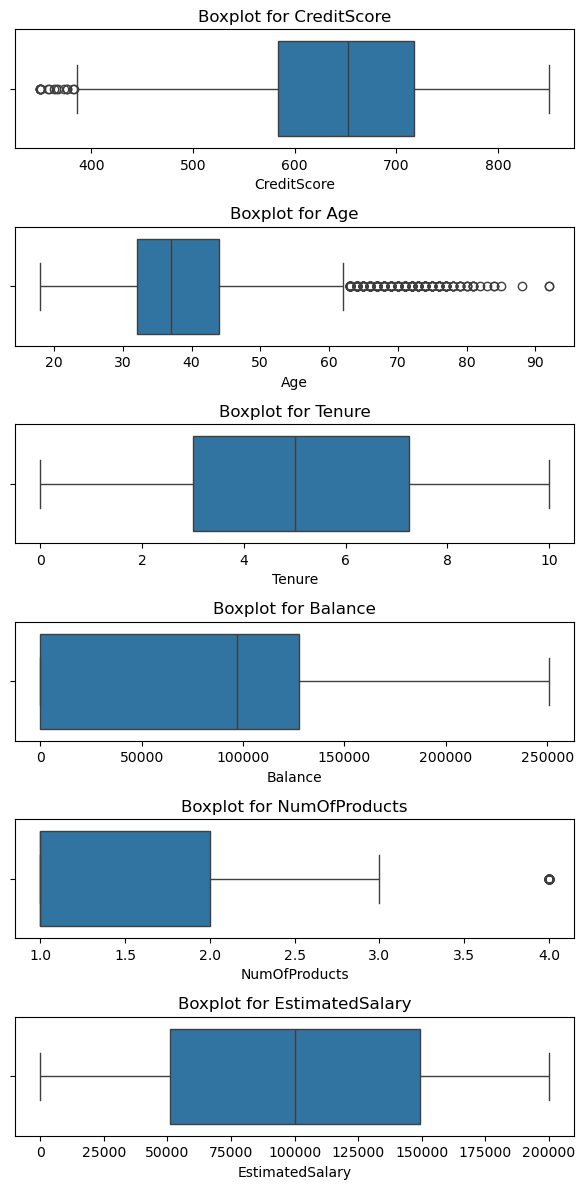

In [9]:
plots.plot_horizontal_boxplot(df, num_vars)

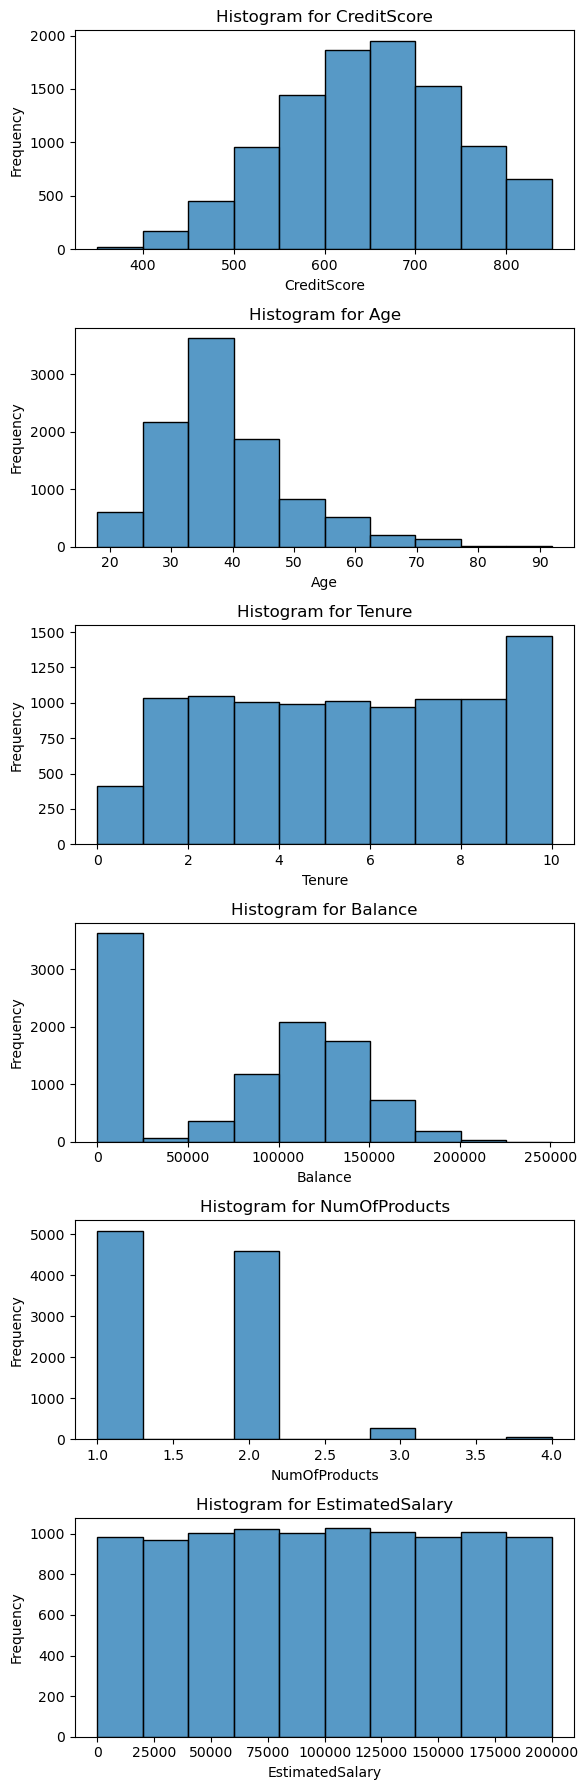

In [10]:
plots.plot_histograms(df, num_vars)

Observaciones:

Hay pocos clientes con poco score crediticio, los cuales representan los outliers hallados. ¿Los clientes con poco score crediticio son los que más abandonan o los que menos abandonan?

La edad tiene la distribución esperada, con varios clientes que han alcanzado edades de hasta 90 años. ¿Hay alguna edad en particular en la que los clientes abandonen?

La distribución de la variable Tenure es uniforme, con una frecuencia un poco más elevada para los clientes que han tenido 10 años la cuenta bancaria. ¿El tiempo influye en el abandono del cliente?

Hay varios clientes con poco balance entre 0 y 25000 en su cuenta. ¿Los clientes con poco balance son los que más abandonan?

Todos los clientes tienen 1 producto o más ¿la cantidad de los productos representa fidelidad?

El salario estimado tiene una distribución uniforme. ¿El salario influye en el abandono de clientes si quiera?

In [22]:
df.groupby('Exited')['CreditScore'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7959.0,651.821837,95.617433,405.0,585.0,653.0,718.0,850.0
1,2037.0,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0


In [36]:
df[(df['Exited'] == 1) & (df['CreditScore'] < 405)]['CustomerId'].count()

np.int64(21)

¿Los clientes con poco score crediticio son los que más abandonan o los que menos abandonan?
Efectivamente, hay una pequeña cantidad de clientes con un score crediticio menor a 400 que abandonan (1% de entre los que abandonan). No obstante, la mayoría de clientes que abandonan tienen diferentes scores crediticios, inclusive algunos llegando al máximo posible (850). ¿Este máximo qué representa?

In [37]:
df.groupby('Exited')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7959.0,37.406713,10.125783,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


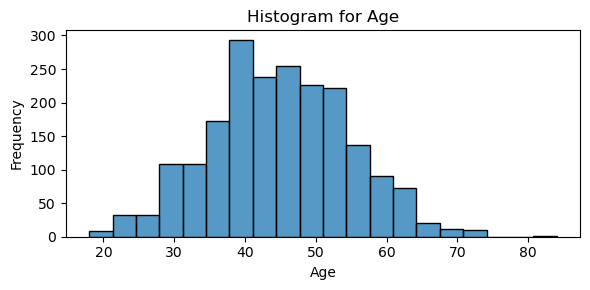

In [40]:
plots.plot_histograms(df[df['Exited'] == 1], 'Age', bins=20)

In [52]:
df[df['Exited'] == 1].groupby('Age')['CustomerId'].count()

Age
18.0     2
19.0     1
20.0     2
21.0     3
22.0    12
23.0     6
24.0    14
25.0     6
26.0    14
27.0    13
28.0    23
29.0    28
30.0    24
31.0    33
32.0    32
33.0    44
34.0    33
35.0    57
36.0    53
37.0    62
38.0    63
39.0    72
40.0    89
41.0    69
42.0    77
43.0    88
44.0    73
45.0    87
46.0    91
47.0    77
48.0    80
49.0    75
50.0    71
51.0    66
52.0    64
53.0    40
54.0    51
55.0    48
56.0    50
57.0    38
58.0    29
59.0    30
60.0    32
61.0    21
62.0    21
63.0    18
64.0    12
65.0     8
66.0     7
67.0     5
68.0     6
69.0     2
70.0     4
71.0     7
72.0     1
73.0     1
74.0     1
84.0     1
Name: CustomerId, dtype: int64

¿Hay alguna edad en particular en la que los clientes abandonen? 
Efectivamente, la mayoría de clientes abandonan entre los 35 y 56 años, pero hay que tener en cuenta que esto se distribuye de esa manera y no hay

Preguntas planteadas anteriormente:

¿Hay alguna edad en particular en la que los clientes abandonen?

¿El tiempo influye en el abandono del cliente?

¿Los clientes con poco balance son los que más abandonan?

¿La cantidad de los productos representa fidelidad?

¿El salario influye en el abandono de clientes si quiera?

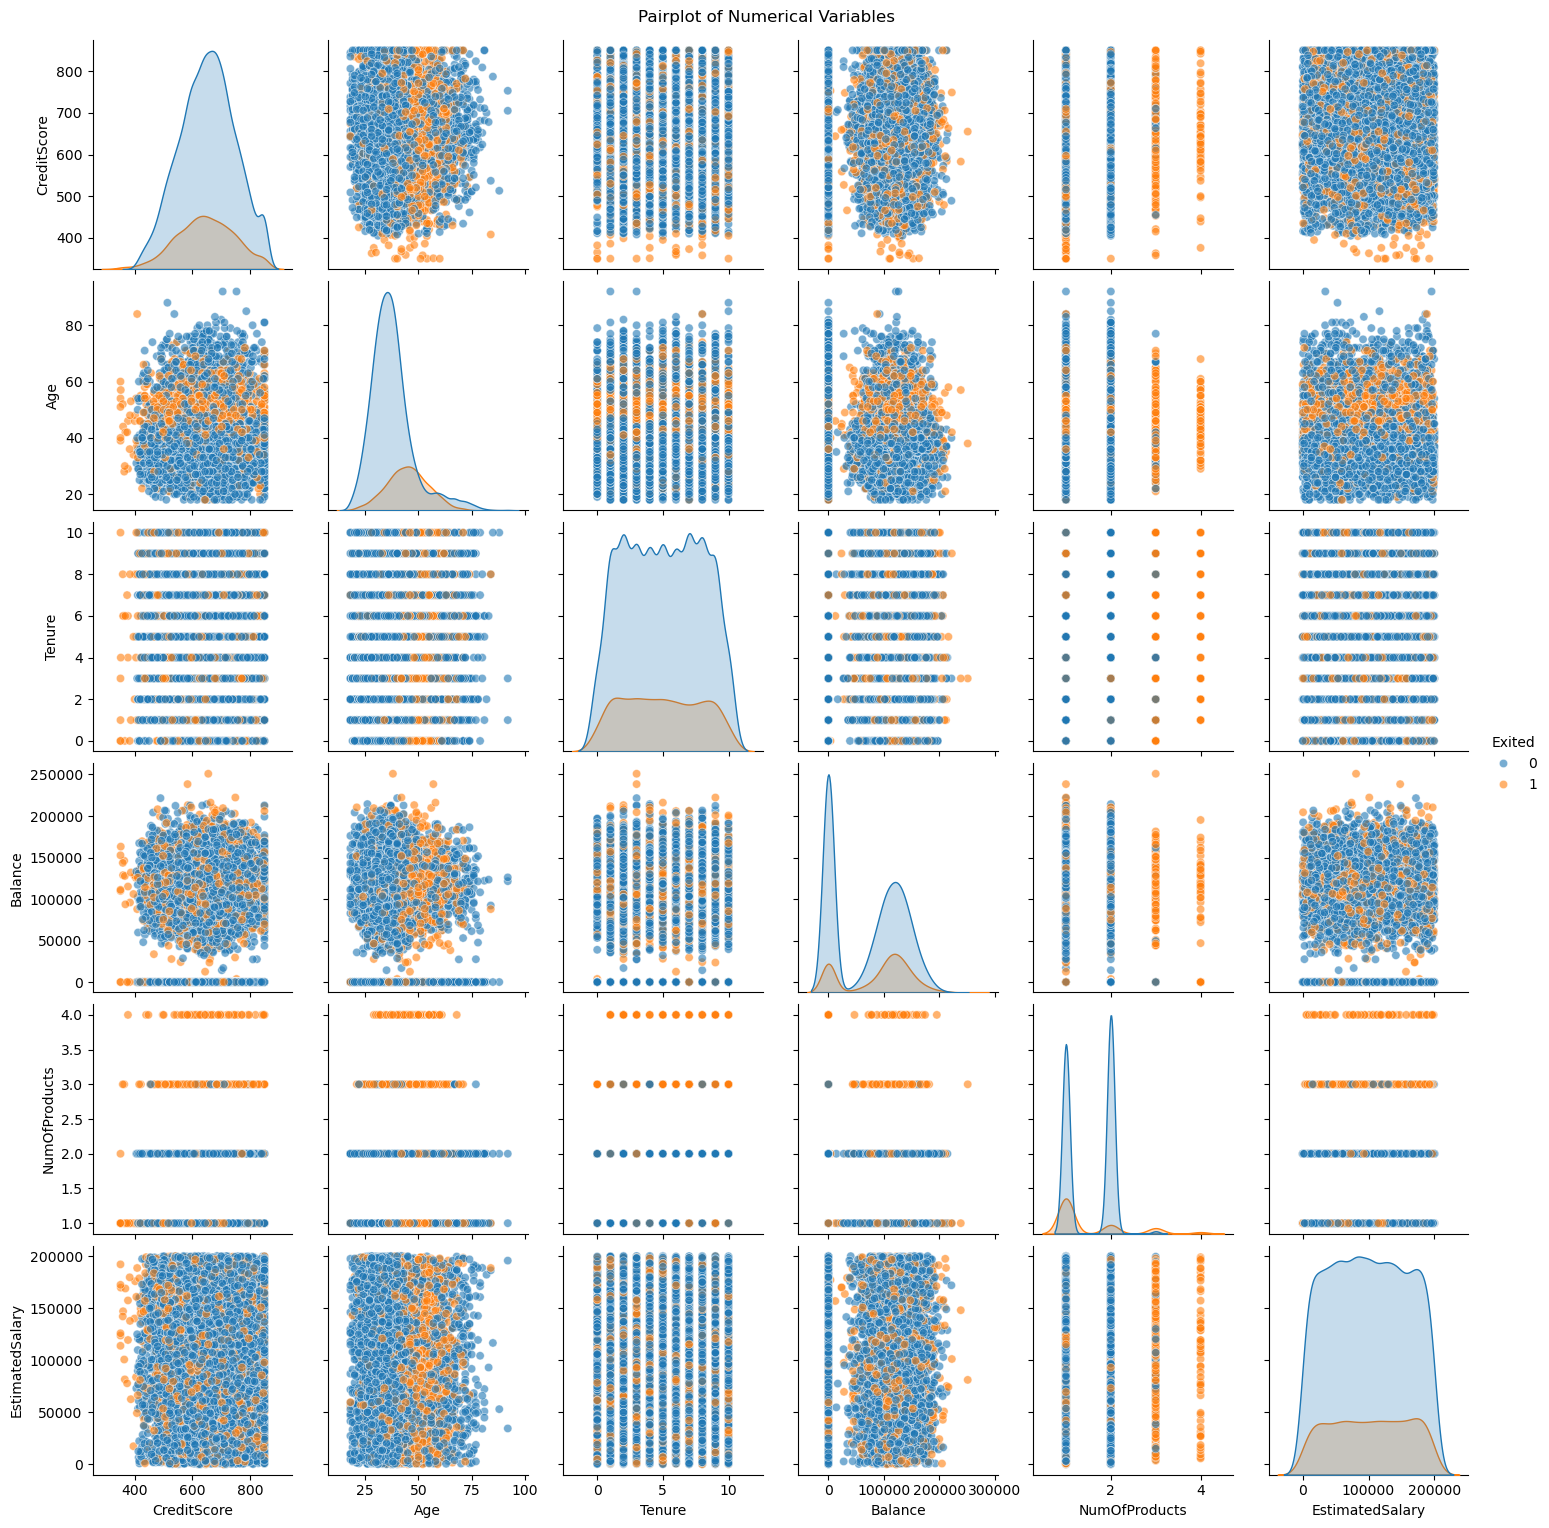

In [87]:
plots.plot_pairplot(df, num_vars, 'Exited')

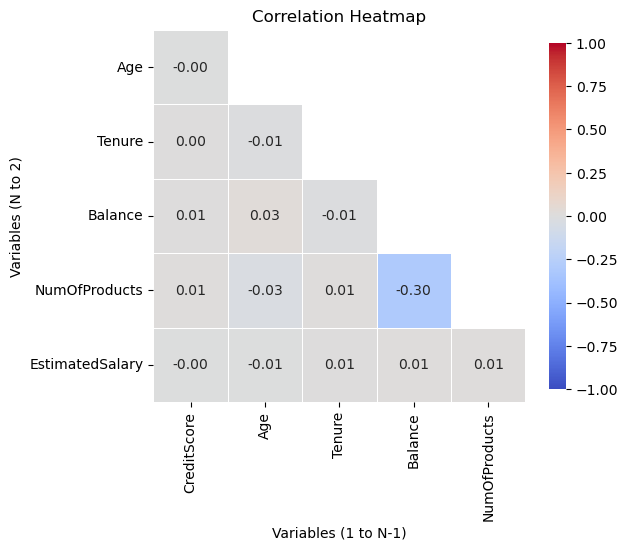

In [27]:
plots.plot_correlation_heatmap(df[not_cat_vars])

In [28]:
df[num_vars].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004118,0.000918,0.006459,0.012447,-0.001082
Age,-0.004118,1.000000,-0.010133,0.028469,-0.030885,-0.007049
Tenure,0.000918,-0.010133,1.000000,-0.011958,0.013230,0.007789
Balance,0.006459,0.028469,-0.011958,1.000000,-0.304116,0.012731
NumOfProducts,0.012447,-0.030885,0.013230,-0.304116,1.000000,0.014292
EstimatedSalary,-0.001082,-0.007049,0.007789,0.012731,0.014292,1.000000


Hello world